# Report pH Determination

In [3]:
import itertools
import os
import sys

import click
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns
import numpy as np
from rich import print, traceback
from statannotations.Annotator import Annotator
from IPython.display import display, Markdown
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
ratio_path = "ratios.tsv"
img_path = "brightfields/"
pred_path = "predictions/"
ratio_img_path = "ratios/"

## Plots

# Meristematic Zone

,test_description,test_short_name,stat_str,stat_value,pvalue,_corrected_significance,_correction_method,alpha,comb
0,Welch's t-test independent samples,t-test_welch,t,2.136649,0.054322,None,None,0.05,Col-0 Mock vs. Col-0 BL
1,Welch's t-test independent samples,t-test_welch,t,0.710977,0.495821,None,None,0.05,bri1-301 Mock vs. bri1-301 BL


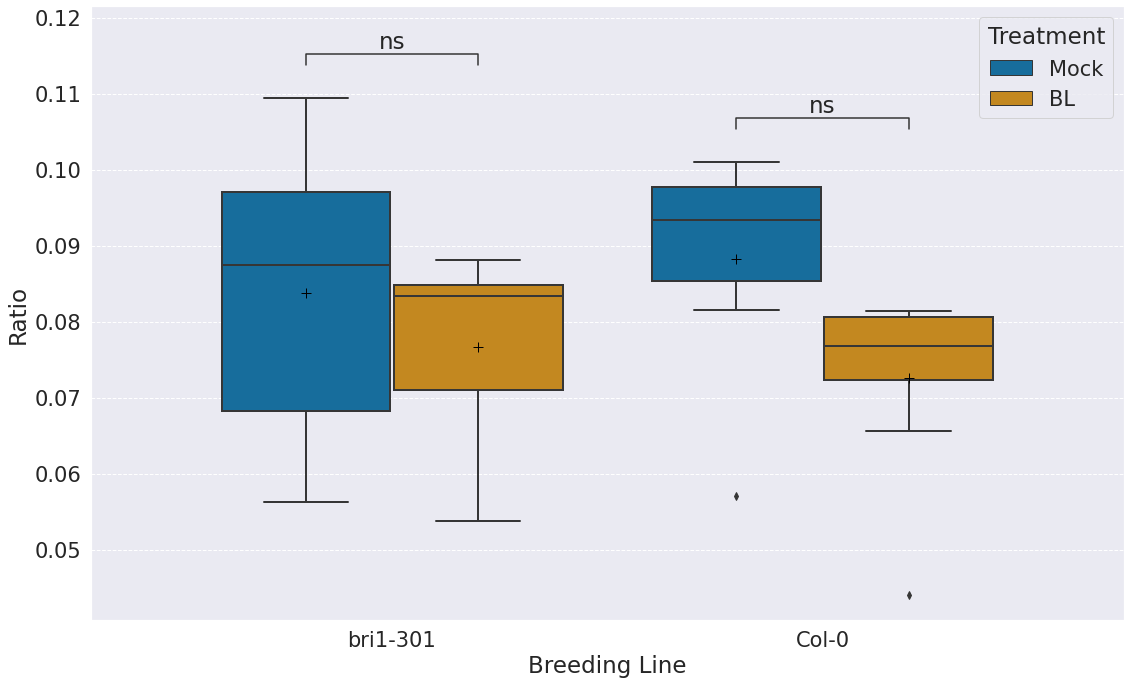

# Early Elongation Zone

,test_description,test_short_name,stat_str,stat_value,pvalue,_corrected_significance,_correction_method,alpha,comb
0,Welch's t-test independent samples,t-test_welch,t,3.249650,0.024155,None,None,0.05,Col-0 Mock vs. Col-0 BL
1,Welch's t-test independent samples,t-test_welch,t,0.761403,0.462589,None,None,0.05,bri1-301 Mock vs. bri1-301 BL


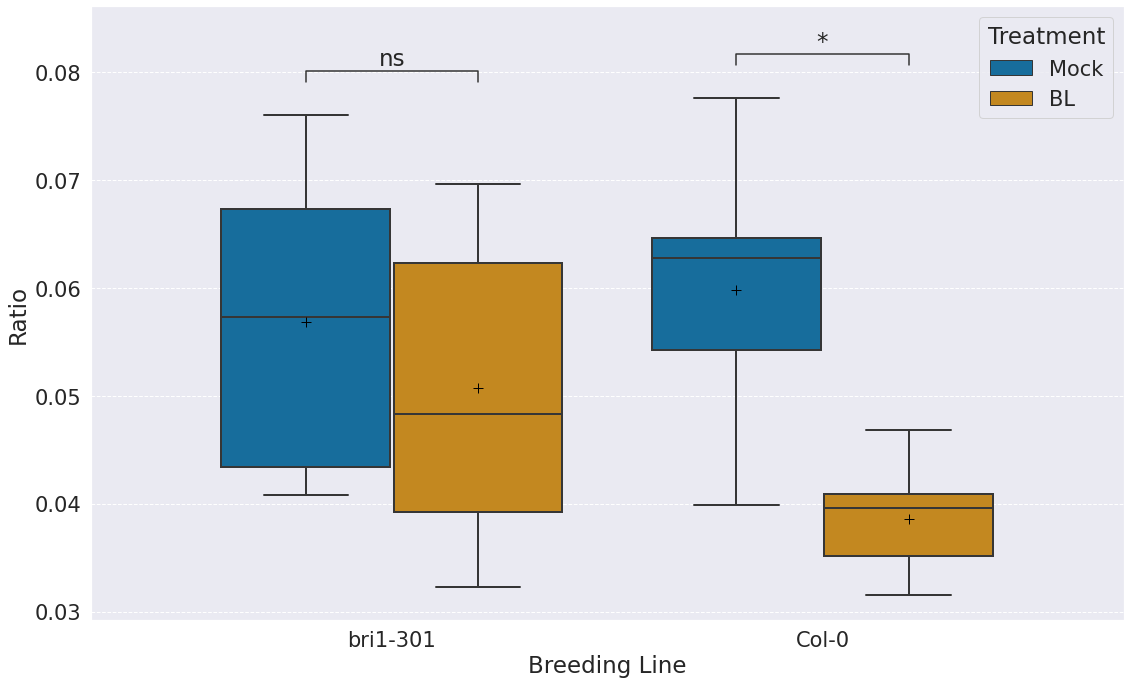

In [39]:
df = pd.read_csv(ratio_path, sep = '\t', header=0)
sns.set(style="darkgrid", font_scale=1.5, palette="colorblind",
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
plt.rcParams["figure.figsize"] = (10 * 1.62, 10)  # (w, h)
output = "output"
font_options = {
    "axes.labelsize": 23,
    "font.size": 23,
    "legend.fontsize": 21,
    'legend.title_fontsize': 23,
    "xtick.labelsize": 21,
    "ytick.labelsize": 21,
}
plt.rcParams.update(font_options)
df = df.dropna()
product = set(itertools.product(df['Breeding Line'], df['Treatment']))
box_pairs = ([(a, b) for a, b in itertools.combinations(product, 2) if a[0] == b[0]])
os.makedirs(output, exist_ok=True)
for zone in df["Zone"].unique():
    ## test
    data = df[df["Zone"] == zone]
    ax = sns.boxplot(x="Breeding Line", y="Ratio", hue="Treatment",
                     data=data, showmeans=True, meanprops={"marker": "+",
                                                                             "markeredgecolor": "black",
                                                                             "markersize": "10"})
    annotator = Annotator(ax, box_pairs, data=data, x="Breeding Line", y="Ratio", hue="Treatment",verbose=False)
    display(Markdown(f"# {zone}"))
    annotator.configure(test='t-test_welch', show_test_name=False, text_format='star', loc='inside')
    annotator.apply_test()
    ax, test_results = annotator.annotate()
    dfs = pd.DataFrame()
    for res in test_results:
        dic = res.data.__dict__
        dfss = pd.DataFrame.from_dict(dic)
        dfss['comb'] = f"{dic['group1'][0]} {dic['group1'][1]} vs. {dic['group2'][0]} {dic['group2'][1]}"
        dfs = dfs.append(dfss.drop(0, axis=0), ignore_index=True)
    display(dfs.drop(['group1', 'group2'], axis=1))
    annotator.reset_configuration()
    plt.tight_layout()
    plt.show()
    plt.close()

# Ratios

In [38]:
display(df)

,Filename,Treatment,Breeding Line,Ratio,Zone
0,Image 70,Mock,bri1-301,0.056211,Meristematic Zone
1,Image 71,Mock,bri1-301,0.040823,Early Elongation Zone
2,Image 72,Mock,bri1-301,0.063845,Meristematic Zone
3,Image 73,Mock,bri1-301,0.041183,Early Elongation Zone
4,Image 74,Mock,bri1-301,0.081595,Meristematic Zone
5,Image 75,Mock,bri1-301,0.050204,Early Elongation Zone
6,Image 76,Mock,bri1-301,0.093301,Meristematic Zone
7,Image 77,Mock,bri1-301,0.068330,Early Elongation Zone
8,Image 78,Mock,bri1-301,0.109438,Meristematic Zone
9,Image 79,Mock,bri1-301,0.076030,Early Elongation Zone


In [ ]:
fig, axs = plt.subplots(len(df["Filename"]), 3, figsize=(6, 80))
for idx, file in enumerate(df["Filename"]):
    img = plt.imread(f"{img_path}{file}.tif")
    ratio_img = plt.imread(f"{ratio_img_path}{file}_ratio.tif")
    pred_img = np.load(f"{pred_path}{file}.npy")
    axs[idx][0].set_axis_off()
    axs[idx][0].imshow(img)
    axs[idx][1].set_axis_off()
    axs[idx][1].imshow(ratio_img)
    axs[idx][2].set_axis_off()
    axs[idx][2].imshow(pred_img)